In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,7 # set figure size for plots

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/adult-income-dataset/adult.csv


## Below are the questions I want to answer using the adult-income-dataset
#### 1. Which kind of people make more than $50000$ a year?
#### 2. Which kind of people make less than or equal to $50,000$ a year?
#### 3. Which attributes seem to be linked?

Lets first look at the first few rows of the dataset to see the attributes and what some of the attribute's values are.

In [2]:
adult = pd.read_csv(os.path.join(dirname,filename))
adult.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Now we will get a better idea of the numerical columns values that make up the dataset.

In [3]:
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


We now know that the average age of the people in this dataset is almost 39 years old and they work about 40 hours a week. This makes sense because most people typically work 40 hours a week.
Next we will check how many people make above and below $50,000 a year.

37155 make <=50K a year.
11687 make >50K a year.
Therefore 0.3145% people make more than 50,000 a year.


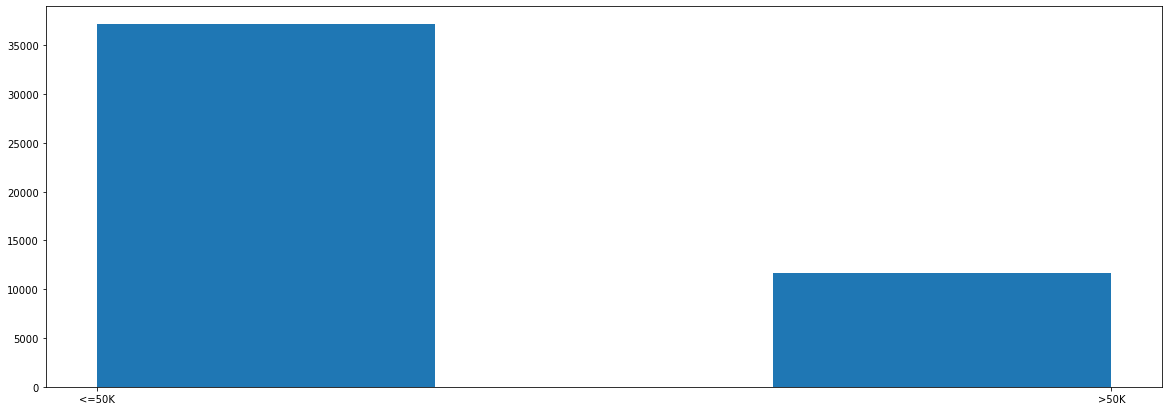

In [13]:
plt.hist(adult['income'], bins=3)
print(adult['income'].value_counts()[0], 'make <=50K a year.')
print(adult['income'].value_counts()[1], 'make >50K a year.')
print('Therefore {}% people make more than 50,000 a year.'.format(round(adult['income'].value_counts()[1]/adult['income'].value_counts()[0], 4)))

Next we will see which numerical attributes affect others when changed. Below we see that the relationship between educational-num and capital-gain and educational-num and hours-per-week have the highest correlation scores of 0.13 and 0.14 respectively. These are the highest because there are no scores less than -0.14 or greater than 0.14. The positive correlation score means that if educational-num decreases(increases) then capital-gain and hours-per-week also decreases(increases). They are said to have very weak correlation though.

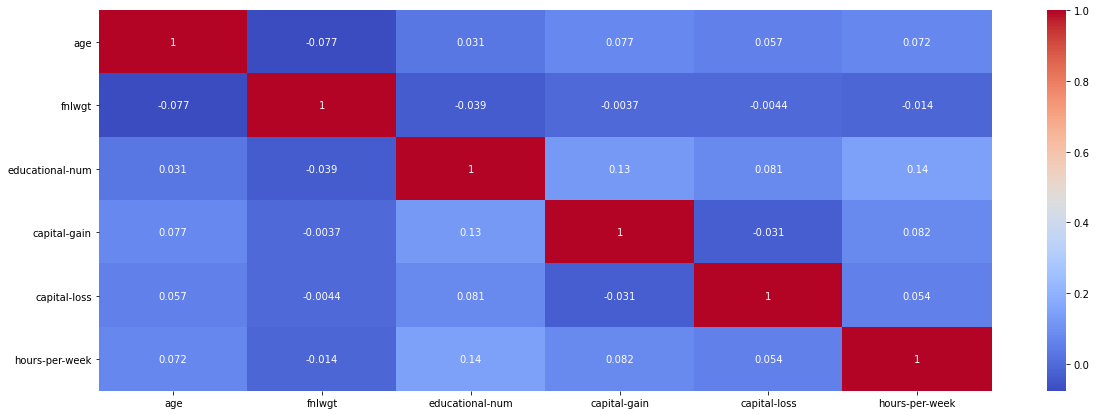

In [5]:
sns.heatmap(adult.corr(), cmap='coolwarm', annot=True);

Now we look to see which entries have the highest and lowest value in the 'fnlwgt' column.

In [6]:
maxfnlwgt = adult['fnlwgt'].max()
adult[adult['fnlwgt']==maxfnlwgt] # The census believes this entry represents 1,490,400 people.

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
7974,27,Private,1490400,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


In [7]:
minfnlwgt = adult['fnlwgt'].min()
adult[adult['fnlwgt']==minfnlwgt] # The census believes this entry represents 12,285 people.

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
33377,25,?,12285,Some-college,10,Never-married,?,Not-in-family,Amer-Indian-Eskimo,Female,0,0,20,United-States,<=50K


Now that we have begun to explore the surface of the data we will want to dig deeper and begin to answer the questions we asked earlier. For the first 2 questions I predict people who have a higher education, are male, are white, and have an office job make more per year.

In [8]:
# Group education levels less than or equal to 12th grade
adultedu = adult
adultedu['education'] = adultedu['education'].replace(to_replace=['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'], value='<=HS')

lessadult = adult[adult['income'] == '<=50K']
moreadult = adult[adult['income'] == '>50K']

The <=HS education level has 6042 making <=50K
The <=HS education level has 366 making >50K
The HS-grad education level has 13281 making <=50K
The HS-grad education level has 2503 making >50K
The Assoc-acdm education level has 1188 making <=50K
The Assoc-acdm education level has 413 making >50K
The Some-college education level has 8815 making <=50K
The Some-college education level has 2063 making >50K
The Prof-school education level has 617 making <=50K
The Prof-school education level has 217 making >50K
The Bachelors education level has 4712 making <=50K
The Bachelors education level has 3313 making >50K
The Masters education level has 1459 making <=50K
The Masters education level has 1198 making >50K
The Doctorate education level has 431 making <=50K
The Doctorate education level has 163 making >50K
The Assoc-voc education level has 1539 making <=50K
The Assoc-voc education level has 522 making >50K


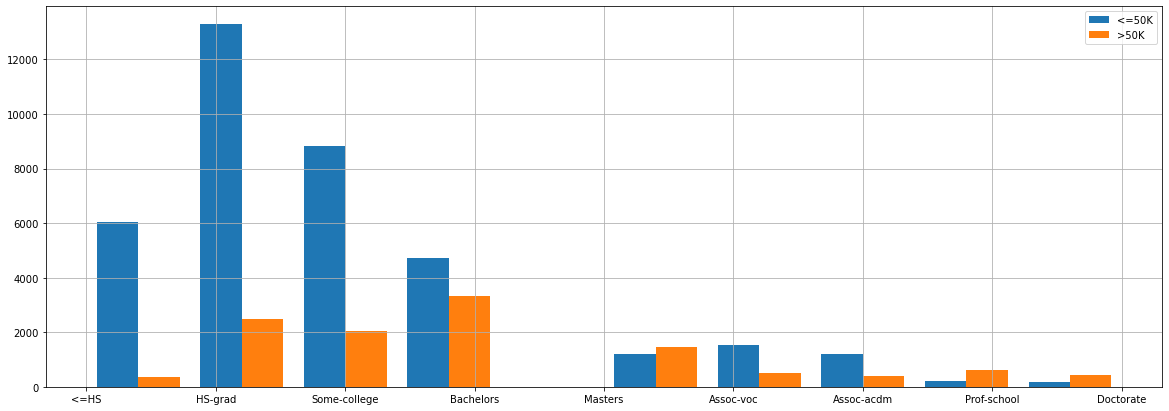

In [9]:
plt.hist([lessadult['education'], moreadult['education']], label=['<=50K', '>50K'], bins=10);
plt.grid(b=True)
plt.legend(prop={'size':10});

educations = list(adult['education'].unique())
for education in educations:
    df = adult[adult['education'] == education]
    incomes = df['income'].value_counts()
    print("The {} education level has {} making <=50K".format(education, incomes[0]))
    print("The {} education level has {} making >50K".format(education, incomes[1]))

Any education levels lower than a Bachelors degree, with the exception of Prof-school, have a lower ratio of people earning more than 50K. Starting from Bachelors through Doctorate the ratio of people making more than 50K increases. <br><br> What we can infer: People with a higher education tend to make more than 50K a year.

The Male sex has 22732 making <=50K
The Male sex has 9918 making >50K
The Female sex has 14423 making <=50K
The Female sex has 1769 making >50K


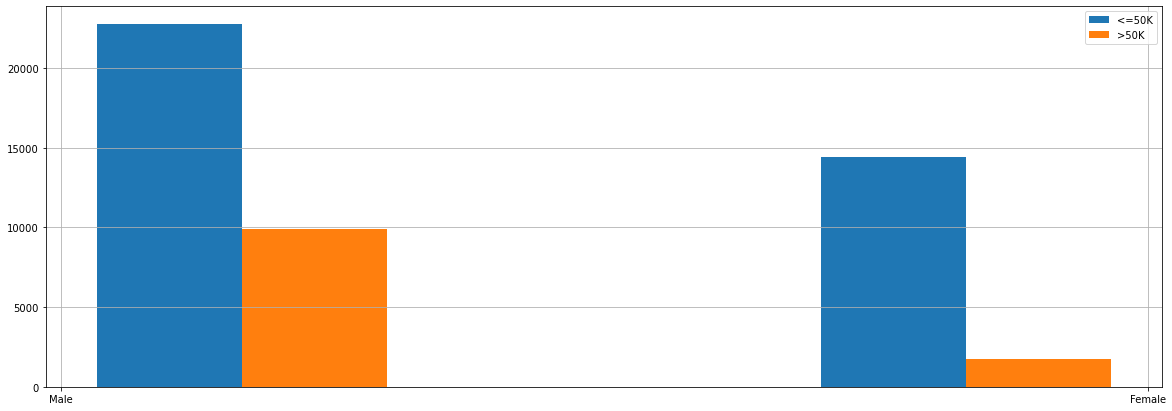

In [10]:
plt.hist([lessadult['gender'], moreadult['gender']], label=['<=50K', '>50K'], bins=3);
plt.grid(b=True)
plt.legend(prop={'size':10});

genders = list(adult['gender'].unique())
for gender in genders:
    df = adult[adult['gender'] == gender]
    incomes = df['income'].value_counts()
    print("The {} sex has {} making <=50K".format(gender, incomes[0]))
    print("The {} sex has {} making >50K".format(gender, incomes[1]))

What we can infer: In this dataset a higher ratio of males tend to make more than 50K compared to females.

The Black race has 4119 making <=50K
The Black race has 566 making >50K
The White race has 31155 making <=50K
The White race has 10607 making >50K
The Asian-Pac-Islander race has 1110 making <=50K
The Asian-Pac-Islander race has 409 making >50K
The Other race has 356 making <=50K
The Other race has 50 making >50K
The Amer-Indian-Eskimo race has 415 making <=50K
The Amer-Indian-Eskimo race has 55 making >50K


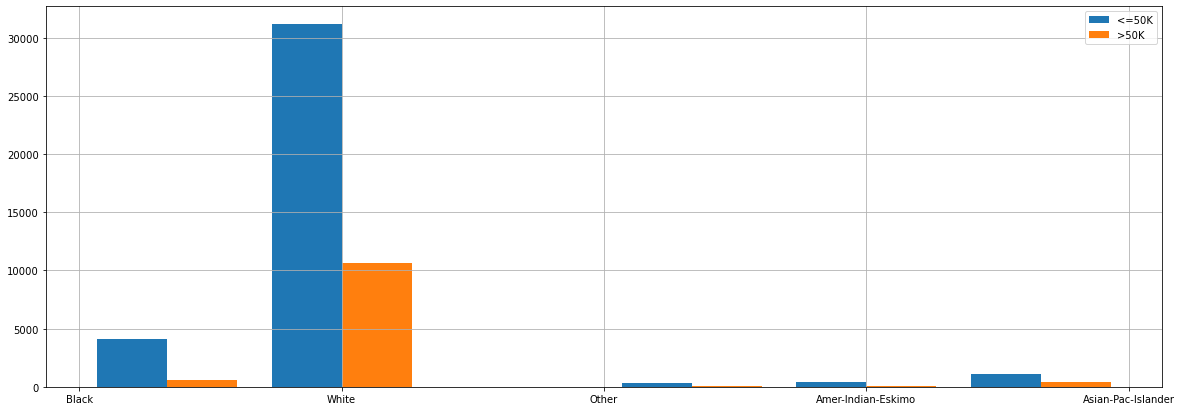

In [11]:
plt.hist([lessadult['race'], moreadult['race']], label=['<=50K', '>50K'], bins=6);
plt.grid(b=True)
plt.legend(prop={'size':10});

races = list(adult['race'].unique())
for race in races:
    df = adult[adult['race'] == race]
    incomes = df['income'].value_counts()
    print("The {} race has {} making <=50K".format(race, incomes[0]))
    print("The {} race has {} making >50K".format(race, incomes[1]))

I predicted White people would have a higher ratio of people earning more than 50K compared to all other races, but it turned out Asian-Pac-Islander had the highest ratio at about 36.8%.

The Machine-op-inspct occupation has 2650 making <=50K
The Machine-op-inspct occupation has 372 making >50K
The Farming-fishing occupation has 1317 making <=50K
The Farming-fishing occupation has 173 making >50K
The Protective-serv occupation has 675 making <=50K
The Protective-serv occupation has 308 making >50K
The ? occupation has 2544 making <=50K
The ? occupation has 265 making >50K
The Other-service occupation has 4719 making <=50K
The Other-service occupation has 204 making >50K
The Prof-specialty occupation has 3388 making <=50K
The Prof-specialty occupation has 2784 making >50K
The Craft-repair occupation has 4729 making <=50K
The Craft-repair occupation has 1383 making >50K
The Adm-clerical occupation has 4843 making <=50K
The Adm-clerical occupation has 768 making >50K
The Exec-managerial occupation has 3178 making <=50K
The Exec-managerial occupation has 2908 making >50K
The Tech-support occupation has 1026 making <=50K
The Tech-support occupation has 420 making >50K
The Sa

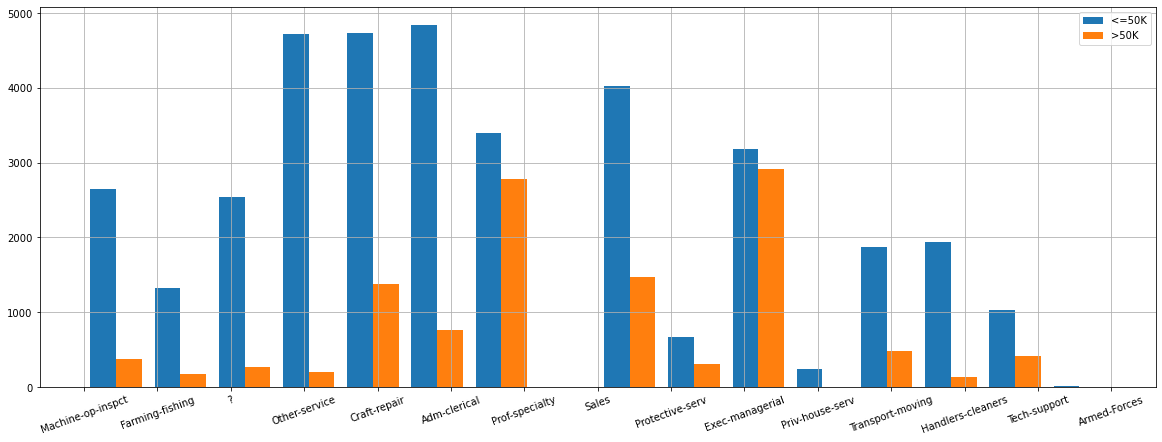

In [12]:

plt.hist([lessadult['occupation'], moreadult['occupation']], label=['<=50K', '>50K'], bins=16);
plt.xticks(rotation=20)
plt.grid(b=True)
plt.legend(prop={'size':10});

occupations = list(adult['occupation'].unique())
for occupation in occupations:
    df = adult[adult['occupation'] == occupation]
    incomes = df['income'].value_counts()
    print("The {} occupation has {} making <=50K".format(occupation, incomes[0]))
    print("The {} occupation has {} making >50K".format(occupation, incomes[1]))

My hypothesis of office jobs being the only jobs with a high ratio of high earners is proven to be incorrect with the Prof-specialty occupation. It is interesting to see that Protective-serv also has a high ratio of high earners and an office job such as tech-support and Adm-clerical did not have a high ratio of people earning more than 50K.

#### These insights also lead me to ask what the ratio of lower income vs higher income would look like if the fnlwgt column were to be taken into account. Also I am interested to learn which Prof-specialty jobs are earning people more than 50K.